In [ ]:
!pip install -r "/content/drive/MyDrive/Colab Notebooks/LEVX_1km/requirements.txt"

In [ ]:
!pip install lazypredict

In [3]:
import plotly.express as px
import pandas as pd
import numpy as np


coor = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/distan_lat42.22lon-8.63p2R1Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

**Cloud height in meters. Label more or less than 300 feet**

In [4]:
#cloud height in meters
print("Cloud height in meters")
print(pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/LEVX_20192020.csv",
                          usecols = ["time", "skyl1_o","metar_o"],
                          parse_dates=["time"]).set_index("time").sample(100))
station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/LEVX_20192020.csv",
                          usecols = ["time", "skyl1_o"],
                          parse_dates=["time"]).set_index("time")


#clouds height meters to feet
num = pd.to_numeric(station.skyl1_o, errors="coerce")*3.28084

#label more or less than 200 feet
interval = pd.IntervalIndex.from_tuples([(-1, 300),(300,7000)])
labels = ["<=300ft",">300ft"]


station["skyl1_l"] = pd.cut(num, bins=interval,retbins=False,labels=labels)
station["skyl1_l"] = station["skyl1_l"].map({a:b for a,b in zip(interval,labels)})
station["skyl1_l"] = station["skyl1_l"].astype(str).replace("nan","No Cloud")

print("\nStation sample")
print(station.sample(10))

print("\nCloud height frequencies")
print(station["skyl1_l"].value_counts(normalize=True).map(lambda n: '{:.1%}'.format(n)))

Cloud height in meters
                    skyl1_o                                            metar_o
time                                                                          
2020-07-19 05:30:00       M  LEVX 190530Z VRB01KT 0500 R19/P2000 R01/P2000 ...
2019-11-17 21:30:00   701.0  LEVX 172130Z 33007KT 300V360 9999 SCT023 SCT04...
2020-01-18 08:30:00   274.0  LEVX 180830Z 19010KT 160V220 6000 DZ BKN009 BK...
2020-11-13 09:30:00       M  LEVX 130930Z 19007KT 150V220 CAVOK 14/10 Q1019...
2020-12-19 20:00:00   366.0  LEVX 192000Z 20003KT 150V260 7000 SCT012 BKN02...
...                     ...                                                ...
2018-11-10 07:30:00   183.0  LEVX 100730Z 17006KT 120V210 7000 FEW006 SCT02...
2020-12-22 11:00:00   244.0  LEVX 221100Z 18016G28KT 140V230 9999 FEW008 BK...
2020-12-10 09:00:00   152.0  LEVX 100900Z 27005KT 190V330 3000 0500 BCFG -R...
2019-04-22 13:00:00   183.0  LEVX 221300Z 30007KT 250V350 7000 FEW006 SCT04...
2020-11-20 21:30:00       M  

**Forecast D1**

In [6]:
# forecast d1
model1k = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/lat42.22lon-8.63p2R1KmD1.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
model1k

,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2019-01-02 00:00:00,325.189301,0.0,1740.084961,1.217145,2.264327,103401.195312,280.789246,0.781950,24135.000000,8.171858,...,0.000000,0.000000e+00,0.142531,0.000000,0.0,0.142531,5735.675293,1613.937378,253.634506,281.908569
2019-01-02 01:00:00,333.670044,0.0,1731.173340,1.369249,2.540694,103382.539062,280.565735,0.778615,24135.000000,8.045405,...,0.000000,0.000000e+00,0.112280,0.000000,0.0,0.112280,5732.622559,1611.490601,253.512878,281.793762
2019-01-02 02:00:00,351.552429,0.0,1721.331055,1.275996,2.367275,103355.875000,280.324890,0.790180,24135.000000,7.194441,...,0.000000,-8.593750e-07,0.061034,0.000000,0.0,0.061034,5730.169434,1609.190552,253.402405,281.787689
2019-01-02 03:00:00,33.307388,0.0,1717.657593,0.696653,1.317065,103329.765625,280.101318,0.786697,24135.000000,7.239085,...,0.000000,0.000000e+00,0.065096,0.000000,0.0,0.065096,5728.023926,1606.675903,253.443604,281.926819
2019-01-02 04:00:00,164.234100,0.0,1696.665771,0.224833,0.409460,103310.062500,279.779572,0.795685,24135.000000,6.878137,...,0.000000,-2.343750e-09,0.085678,0.000000,0.0,0.085678,5725.899414,1604.329346,253.527298,281.808014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-01 19:00:00,297.835388,0.0,766.453003,6.263795,12.470805,101635.929688,279.777435,0.867834,24042.130859,28.299652,...,99.540001,-7.467773e+00,0.000000,0.000000,0.0,0.000000,5371.030273,1446.678223,240.972382,271.724701
2021-01-01 20:00:00,305.522644,0.0,769.984497,5.884632,12.509005,101664.109375,279.636444,0.861618,24046.214844,27.654913,...,37.480000,-6.560820e+00,0.000000,0.077832,0.0,0.077832,5373.912109,1448.029297,241.139252,271.784821
2021-01-01 21:00:00,304.144806,0.0,787.868713,6.053614,12.777985,101677.812500,279.624115,0.851240,24053.814453,30.302912,...,25.900000,-1.712590e+01,0.000000,0.097343,0.0,0.097343,5376.250977,1449.369507,241.217819,271.922638


In [7]:
df_all1k = pd.concat([station,model1k],axis=1).drop(columns=["skyl1_o"]).dropna()
df_all1k.sample(30)

,skyl1_l,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2019-12-28 18:00:00,No Cloud,44.936741,0.0,2624.330078,0.365636,0.679098,102931.757812,284.910614,0.740193,24135.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,5779.987305,1597.499023,259.256805,285.809998
2020-09-23 23:00:00,>300ft,141.463181,0.0,2313.708740,0.610205,1.222923,101388.296875,287.390411,0.999983,24047.365234,...,7.980000,-6.902500e-01,0.300000,0.421875,0.000000,0.421875,5631.980957,1481.261353,259.782745,282.209198
2020-04-28 02:00:00,<=300ft,185.870178,0.0,1269.043213,1.393354,2.604337,101328.312500,281.293610,0.999966,24037.210938,...,90.570000,-3.229481e+00,0.100000,0.506010,0.500000,0.506010,5454.024902,1443.390625,250.461380,275.233673
2019-09-11 09:00:00,No Cloud,11.395186,0.0,2652.355469,3.812260,5.270545,102698.515625,289.114014,0.773748,24069.587891,...,0.000000,2.812500e-05,0.000000,0.000000,0.000000,0.000000,5815.215820,1566.154785,264.511444,284.600189
2020-06-03 08:00:00,>300ft,280.871613,0.0,2388.611816,1.487163,1.817379,101390.140625,287.986511,0.972937,39.506393,...,1.616400,-2.382812e-05,0.000000,0.550753,0.000000,0.550753,5645.916992,1482.556152,259.770050,283.825195
2020-09-26 08:00:00,>300ft,117.214272,0.0,2186.436523,0.174607,0.318155,102771.304688,284.776886,0.951489,24051.888672,...,0.000000,2.265625e-04,0.000000,0.440818,0.000000,0.440818,5756.532715,1552.149292,263.533447,279.567444
2019-08-07 04:00:00,<=300ft,169.646133,0.0,2728.967773,0.822077,1.616086,101389.984375,286.884308,0.999975,24040.927734,...,0.000000,-7.812500e-05,0.000000,0.000000,0.000000,0.000000,5687.363281,1490.953979,263.734436,285.190369
2020-04-11 21:00:00,No Cloud,330.134857,0.0,1628.604248,2.318836,2.756905,101963.843750,284.252106,0.985611,43.225376,...,0.000000,-3.164063e-04,0.000000,0.195620,0.000000,0.195620,5583.687988,1500.905884,251.577881,278.513184
2019-06-24 02:00:00,No Cloud,304.079163,0.0,1958.454956,0.335531,0.673441,101432.273438,284.237610,0.999977,24233.259766,...,0.000000,-3.125000e-05,0.012445,0.050869,0.000000,0.050869,5614.754883,1477.136353,258.960327,281.849487


**Scatter plot significant meteorological variables and skyl1_l**

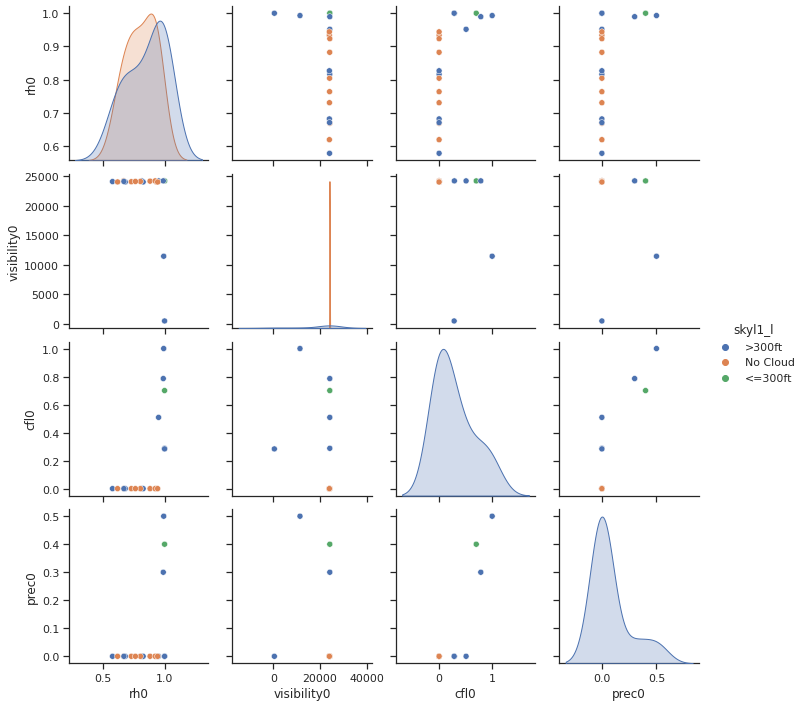

In [8]:
import seaborn as sns

sns.set_theme(style="ticks")

sns.pairplot(df_all1k[["skyl1_l","rh0","visibility0","cfl0","prec0"]].sample(20), hue="skyl1_l");

**Scatter plot 3 PCA variables and skyl1_l**

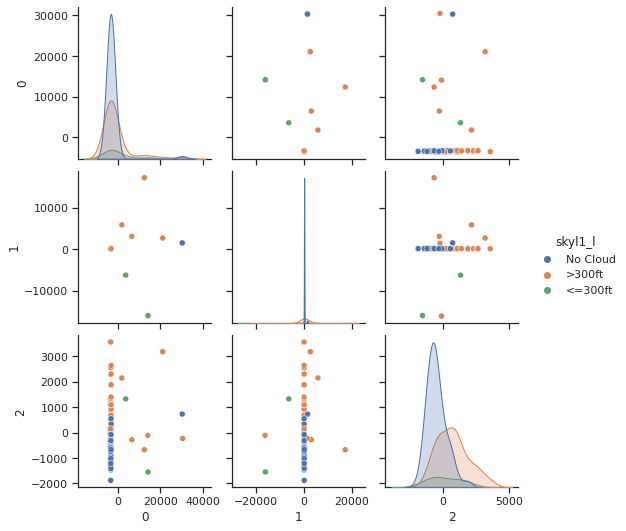

In [9]:
from sklearn.decomposition import PCA

df_pca = pd.DataFrame(PCA(n_components=3).fit_transform(df_all1k.iloc[:,1:]),
                                                        index =df_all1k.index)
df_pca["skyl1_l"] = df_all1k.skyl1_l
sns.pairplot(df_pca.sample(100), hue="skyl1_l");

**Machine learning models. X variables**

In [10]:
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501'],
      dtype='object')

In [11]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

# X and Y
Y = df_all1k.skyl1_l
X = df_all1k.iloc[:,1:]


X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)

100%|██████████| 29/29 [02:46<00:00,  5.74s/it]


In [12]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.83,0.75,None,0.82,2.94
LabelSpreading,0.78,0.74,None,0.78,18.57
LabelPropagation,0.78,0.74,None,0.78,19.42
LGBMClassifier,0.81,0.73,None,0.80,3.08
RandomForestClassifier,0.81,0.73,None,0.80,8.20
BaggingClassifier,0.78,0.72,None,0.78,5.66
KNeighborsClassifier,0.78,0.71,None,0.77,2.17
LogisticRegression,0.77,0.68,None,0.76,7.38
XGBClassifier,0.77,0.68,None,0.76,12.20


**ML LGBMClassifier. Accuracy forecast day 0 = 0.85**

In [13]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# X and Y
Y = df_all1k.skyl1_l
X = df_all1k.iloc[:,1:]

# mean accuracy machine learning sample array
acc_ml = []

#seed random function to create TWO RELATED samples of scores
np.random.seed(1)

for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  ml_model = LGBMClassifier(n_estimators=250).fit(X_train,y_train)
  #ml_model = ExtraTreesClassifier().fit(X_train,y_train)

  y_pred = ml_model.predict(X_test)
  acc_ml.append(round(accuracy_score(y_test, y_pred),2))

  #Confusion matrix
  print("\nConfusion matrix  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  #plt.figure(figsize=(12, 9))
  #sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt='.0f');

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)


print("\nAccuracy mean of samples: ",acc_ml)



Confusion matrix  (Machine Learning)

col_0     <=300ft  >300ft  No Cloud   All
skyl1_l                                  
<=300ft       181     141        45   367
>300ft         55     932       112  1099
No Cloud        9     100      1000  1109
All           245    1173      1157  2575

Quality report (Machine Learning)

              precision  recall  f1-score  support
<=300ft            0.74    0.49      0.59   367.00
>300ft             0.79    0.85      0.82  1099.00
No Cloud           0.86    0.90      0.88  1109.00
accuracy           0.82    0.82      0.82     0.82
macro avg          0.80    0.75      0.76  2575.00
weighted avg       0.82    0.82      0.81  2575.00

Confusion matrix  (Machine Learning)

col_0     <=300ft  >300ft  No Cloud   All
skyl1_l                                  
<=300ft       200     147        37   384
>300ft         56     902       117  1075
No Cloud        6      87      1023  1116
All           262    1136      1177  2575

Quality report (Machine 

**ML ExtraTreesClassifier**

In [14]:
# X and Y
Y = df_all1k.skyl1_l
X = df_all1k.iloc[:,1:]

# mean accuracy machine learning sample array
acc_ml_ext = []

#seed random function to create TWO RELATED samples of scores
np.random.seed(1)

for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  #ml_model = LGBMClassifier(n_estimators=250).fit(X_train,y_train)
  ml_model = ExtraTreesClassifier(n_estimators=250).fit(X_train,y_train)

  y_pred = ml_model.predict(X_test)
  acc_ml_ext.append(round(accuracy_score(y_test, y_pred),2))

  #Confusion matrix
  print("\nConfusion matrix  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  #plt.figure(figsize=(12, 9))
  #sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt='.0f');

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)


print("\nAccuracy mean of samples: ",acc_ml_ext)


Confusion matrix  (Machine Learning)

col_0     <=300ft  >300ft  No Cloud   All
skyl1_l                                  
<=300ft       192     133        42   367
>300ft         37     955       107  1099
No Cloud       10      86      1013  1109
All           239    1174      1162  2575

Quality report (Machine Learning)

              precision  recall  f1-score  support
<=300ft            0.80    0.52      0.63   367.00
>300ft             0.81    0.87      0.84  1099.00
No Cloud           0.87    0.91      0.89  1109.00
accuracy           0.84    0.84      0.84     0.84
macro avg          0.83    0.77      0.79  2575.00
weighted avg       0.84    0.84      0.83  2575.00

Confusion matrix  (Machine Learning)

col_0     <=300ft  >300ft  No Cloud   All
skyl1_l                                  
<=300ft       214     149        37   400
>300ft         40     900       108  1048
No Cloud        5      78      1044  1127
All           259    1127      1189  2575

Quality report (Machine 

**T test two related samples. This is a test for the null hypothesis that two related samples have identical accuracy means. Alternative hypothesis the mean of the distribution underlying the sample with LGBMClassifier is less than the mean of the distribution underlying the sample with ExtraTreesClassifier. Significance level (alpha) = 0.01**

In [16]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(acc_ml, acc_ml_ext, alternative="less")

print("\nAccuracy with LGBMClassifier:", acc_ml)
print("\nAccuracy with ExtraTreesClassifier:", acc_ml_ext)

print("\nalpha: ",alpha)

print("\np_value point: ",p_value)
if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: accuracy LGBMClassifier = accuracy ExtraTreesClassifier")
    print("\nwe are accepting alternative hypothesis:   accuracy LGBMClassifier is less than accuracy ExtraTreesClassifier")
else:
    print("\nwe are accepting null hypothesis:  H0: accuracy LGBMClassifier = accuracy ExtraTreesClassifier")


Accuracy with LGBMClassifier: [0.82, 0.83, 0.82, 0.83, 0.82, 0.81, 0.81, 0.83, 0.84, 0.83]

Accuracy with ExtraTreesClassifier: [0.84, 0.84, 0.84, 0.85, 0.84, 0.83, 0.84, 0.83, 0.83, 0.84]

alpha:  0.01

p_value point:  0.0022024193811376923

we are rejecting null hypothesis  H0: accuracy LGBMClassifier = accuracy ExtraTreesClassifier

we are accepting alternative hypothesis:   accuracy LGBMClassifier is less than accuracy ExtraTreesClassifier


**Add time variables**

In [17]:
df_all1k["hour"] = df_all1k.index.hour
df_all1k["month"] = df_all1k.index.month
df_all1k["dayofyear"] = df_all1k.index.dayofyear
df_all1k["weekofyear"] = df_all1k.index.isocalendar().week.astype(int)

In [18]:
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501', 'hour', 'month', 'dayofyear',
       'weekofyear'],
      dtype='object')

In [19]:
# X and Y
Y = df_all1k.skyl1_l
X = df_all1k.iloc[:,1:]

# mean accuracy machine learning sample array
acc_ml_t = []

#seed random function to create TWO RELATED samples of scores
np.random.seed(1)

for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  ml_model = LGBMClassifier(n_estimators=250).fit(X_train,y_train)
  #ml_model = ExtraTreesClassifier().fit(X_train,y_train)

  y_pred = ml_model.predict(X_test)
  acc_ml_t.append(round(accuracy_score(y_test, y_pred),2))

  #Confusion matrix
  print("\nConfusion matrix  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  #plt.figure(figsize=(12, 9))
  #sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt='.0f');

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)


print("\nAccuracy mean of samples: ",acc_ml_t)


Confusion matrix  (Machine Learning)

col_0     <=300ft  >300ft  No Cloud   All
skyl1_l                                  
<=300ft       199     127        41   367
>300ft         54     941       104  1099
No Cloud        9      89      1011  1109
All           262    1157      1156  2575

Quality report (Machine Learning)

              precision  recall  f1-score  support
<=300ft            0.76    0.54      0.63   367.00
>300ft             0.81    0.86      0.83  1099.00
No Cloud           0.87    0.91      0.89  1109.00
accuracy           0.84    0.84      0.84     0.84
macro avg          0.82    0.77      0.79  2575.00
weighted avg       0.83    0.84      0.83  2575.00

Confusion matrix  (Machine Learning)

col_0     <=300ft  >300ft  No Cloud   All
skyl1_l                                  
<=300ft       218     140        26   384
>300ft         60     911       104  1075
No Cloud       10      79      1027  1116
All           288    1130      1157  2575

Quality report (Machine 

**T test two related samples. This is a test for the null hypothesis that two related samples have identical accuracy means. Alternative hypothesis the accuracy of the distribution underlying the sample without time variables is less than the accuracy of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [20]:

alpha = 0.01
sta, p_value = stats.ttest_rel(acc_ml, acc_ml_t, alternative="less")

print("\nAccuracy without time variables:", acc_ml)
print("\nAccuracy with time variables:", acc_ml_t)

print("\nalpha: ",alpha)

print("\np_value point: ",p_value)
if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: accuracy machine learning without time variables = accuracy machine learning with time variables")
    print("\nwe are accepting alternative hypothesis: the accuracy of the sample without time variables inputs is less than the accuracy of the sample with time variables inputs")
else:
    print("\nwe are accepting null hypothesis:  H0: accuracy accuracy machine learning without time variables = accuracy machine learning with time variables ")



Accuracy without time variables: [0.82, 0.83, 0.82, 0.83, 0.82, 0.81, 0.81, 0.83, 0.84, 0.83]

Accuracy with time variables: [0.84, 0.84, 0.84, 0.85, 0.84, 0.83, 0.83, 0.84, 0.85, 0.84]

alpha:  0.01

p_value point:  2.119869443129872e-06

we are rejecting null hypothesis  H0: accuracy machine learning without time variables = accuracy machine learning with time variables

we are accepting alternative hypothesis: the accuracy of the sample without time variables inputs is less than the accuracy of the sample with time variables inputs


In [21]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":X.columns,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("skyl1_LEVX_1km_time_d1.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=250))])
